# Assignment1


#### Problem1

In [22]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import seaborn as sns
from scipy.optimize import minimize
import pylab
from scipy.stats import norm,kstest,shapiro,t
from scipy.stats import skew, kurtosis
import scipy.stats as stats
from scipy.special import gammaln
import statsmodels.tsa.api as smt

In [23]:
#problem1
samples = 100
skews = np.empty(samples)
kurts = np.empty(samples)
for i in range(samples):
    r = np.random.normal(size=10)
    skews[i] = skew(r)
    kurts[i] = kurtosis(r)

t_skews = stats.ttest_1samp(skews, 0.0)
t_kurts = stats.ttest_1samp(kurts, 0.0)


print(f"Skewness:  {t_skews}")
print(f"Kurtosis:  {t_kurts}")

Skewness:  TtestResult(statistic=2.0500374618129955, pvalue=0.04300426999075204, df=99)
Kurtosis:  TtestResult(statistic=-4.128813911191808, pvalue=7.618955362328446e-05, df=99)


### Problem2

In [24]:
# read data
data_pro2 = pd.read_csv("problem2.csv")
x = np.array(data_pro2["x"])
y = np.array(data_pro2["y"])

#print(data_pro2)

In [25]:
# OLS regression
x_c = sm.add_constant(x)
model = sm.OLS(y, x_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        23:43:33   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.3

Skewness_error:  -0.267266585528796
Kurtosis_error:  3.1931010009568785


/var/folders/xx/wyrzft651g53fn14pqjh6knh0000gn/T/ipykernel_16167/2972837819.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, fit=norm, kde=False)


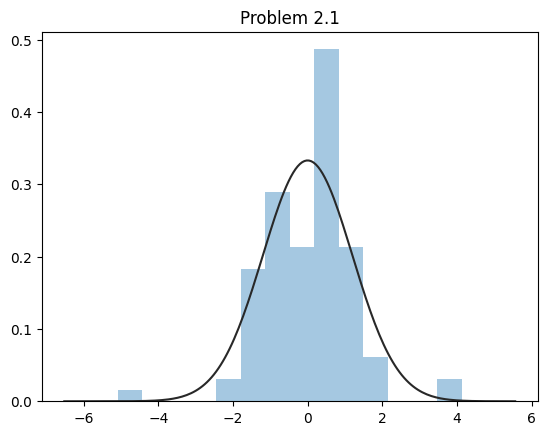

In [26]:
error = results.resid
ske = skew(error)
kurt = kurtosis(error)
print(f"Skewness_error:  {ske}")
print(f"Kurtosis_error:  {kurt}")
# Skewness_error:  -0.267266585528796
# Kurtosis_error:  3.1931010009568785

sns.distplot(error, fit=norm, kde=False)
plt.title("Problem 2.1")
plt.savefig("Problem2_1.png")


In [27]:
# MLE

def Norm_Mle(par, x, y):
    e = y - par[0] - par[1] * x
    log_likelihood = 0
    for i in range(len(e)):
        log_likelihood -= np.log(norm.pdf(e[i], 0, par[2]))
    return log_likelihood

norm_results = minimize(Norm_Mle, x0=(1,1,1), args=(x,y))
print(norm_results)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 159.9920966891629
        x: [ 1.198e-01  6.052e-01  1.198e+00]
      nit: 12
      jac: [ 5.722e-06  3.815e-06 -5.722e-06]
 hess_inv: [[ 1.415e-02 -8.881e-05 -6.227e-05]
            [-8.881e-05  1.537e-02 -2.941e-04]
            [-6.227e-05 -2.941e-04  7.461e-03]]
     nfev: 60
     njev: 15


In [28]:
def T_Mle(params, x, y):
    yhat = np.zeros(len(x))
    for i in range(len(x)):
        yhat[i] = params[0] + params[1]*x[i]
    negLL = 0
    for i in range(len(y)):
        negLL -= np.log(stats.t.pdf(y[i]-yhat[i], params[2], scale=params[3]))
    return(negLL)

t_results = minimize(T_Mle, x0=(1,1,1,1), args=(x,y))
print(t_results)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 155.4729704124668
        x: [ 1.426e-01  5.576e-01  6.277e+00  9.713e-01]
      nit: 22
      jac: [-7.629e-06 -1.907e-06  0.000e+00 -7.629e-06]
 hess_inv: [[ 3.907e-03  1.688e-03 -1.010e-03 -1.922e-03]
            [ 1.688e-03  2.940e-03 -2.347e-03  1.283e-03]
            [-1.010e-03 -2.347e-03  3.042e-03 -2.671e-03]
            [-1.922e-03  1.283e-03 -2.671e-03  5.601e-03]]
     nfev: 150
     njev: 30


In [29]:
def R_Squ(x, y, cons, beta):   
    pred = beta * x + cons
    error = y - pred
    ss_err = sum((error - np.mean(error)) ** 2)
    ss_tot = sum((y - np.mean(y)) ** 2)
    r_squ = 1 - (ss_err / ss_tot)
    return r_squ

r_Norm = R_Squ(x,y,norm_results.x[0],norm_results.x[1])
r_T = R_Squ(x,y,t_results.x[0],t_results.x[1])

print(r_Norm)
print(r_T)

0.19463952391895079
0.19343380972828061


In [30]:
def infor_C(x, k, loglik):
    AIC = 2 * k + 2 * loglik
    BIC = k * np.log(len(x)) + 2 * loglik
    return AIC, BIC



In [34]:
AIC_N, BIC_N = infor_C(x, 2, norm_results.fun)
AIC_T, BIC_T = infor_C(x, 2, t_results.fun)
print("AIC_Normal: {}. BIC_Normal: {}".format(AIC_N, BIC_N))
print("AIC_T: {}. BIC_T: {}".format(AIC_T, BIC_T))

AIC_Normal: 323.9841933783258. BIC_Normal: 329.194533750302
AIC_T: 314.9459408249336. BIC_T: 320.1562811969098


#### Problem3

In [32]:
#problem3
np.random.seed(0)
nsample = 3000

processes = {
    'AR(1)': [np.r_[1, 0.65], np.array([1])],
    'AR(2)': [np.r_[1, 0.65, 0.25], np.array([1])],
    'AR(3)': [np.r_[1, 0.65, 0.25, 0.2], np.array([1])],
    'MA(1)': [np.array([1]), np.r_[1, 0.65]],
    'MA(2)': [np.array([1]), np.r_[1, 0.65, 0.25]],
    'MA(3)': [np.array([1]), np.r_[1, 0.65, 0.25, 0.2]],
}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


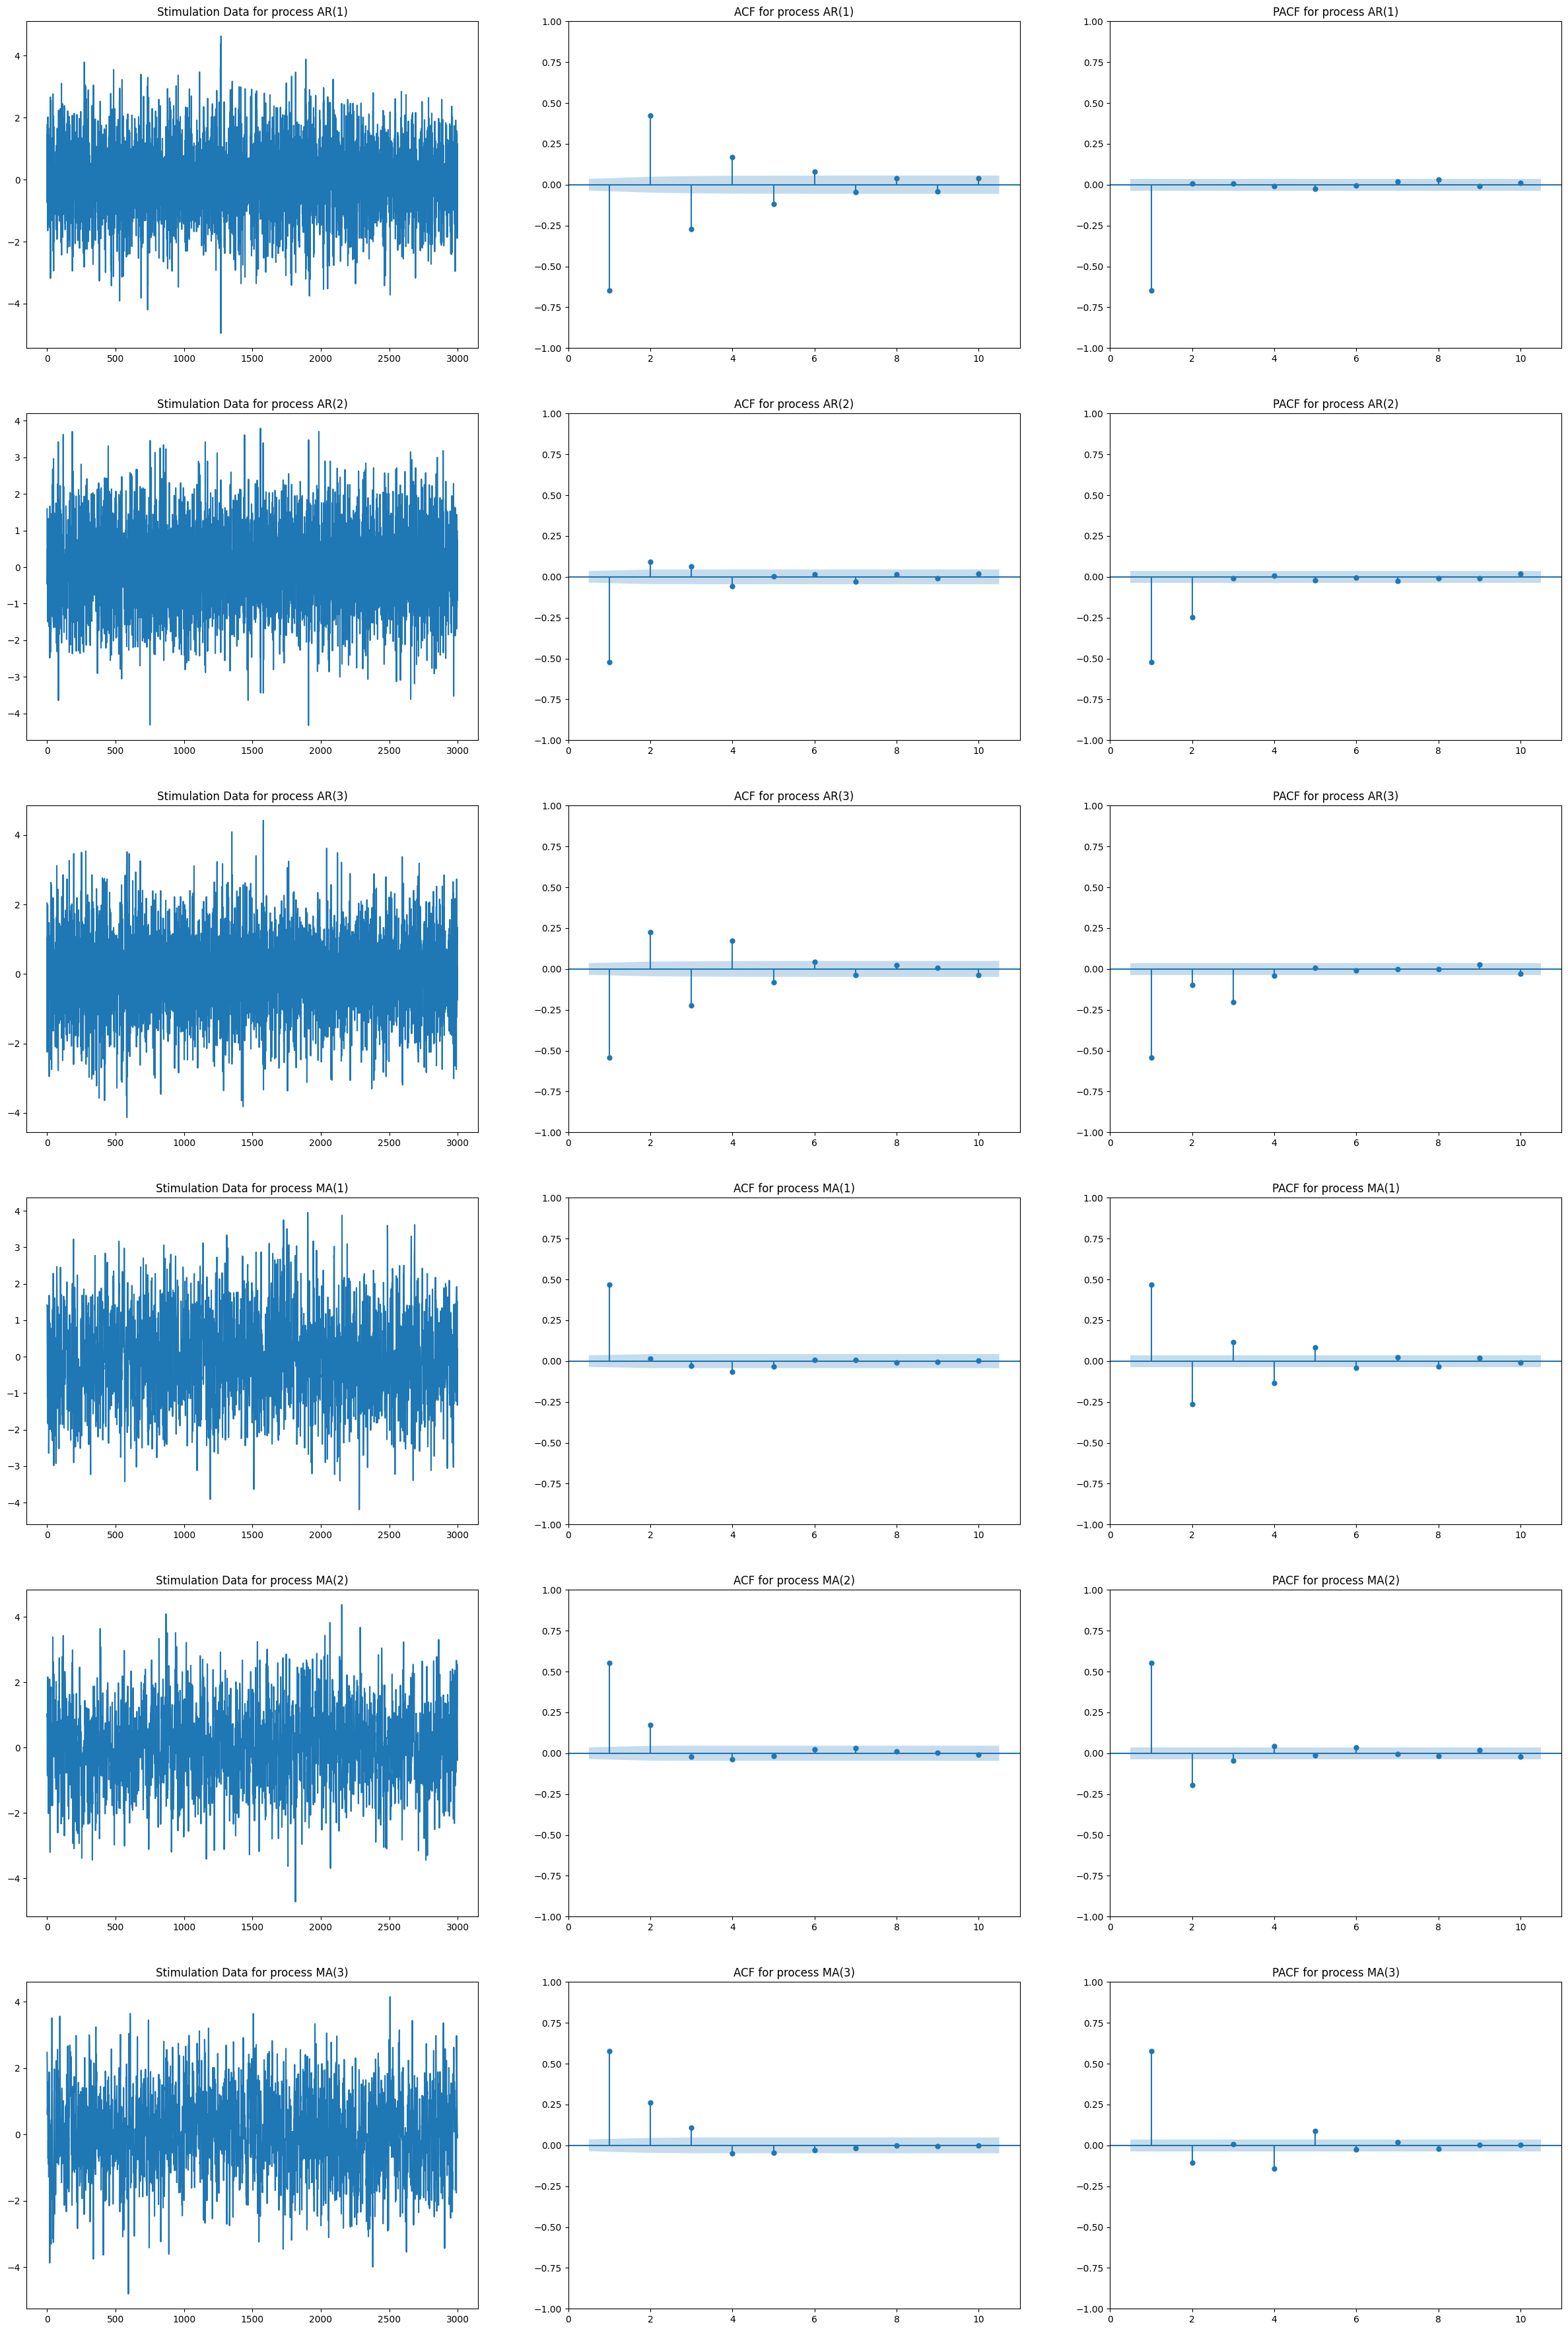

In [33]:
data = {}
for process, (ar, ma) in processes.items():
    data[process] = smt.arma_generate_sample(ar=ar, ma=ma, nsample=nsample)

# Plot data, ACF and PACF for each process
fig, axs = plt.subplots(6, 3, figsize=(30,45))
for i, (process, dat) in enumerate(data.items()):
    axs[i, 0].plot(dat)
    smt.graphics.plot_acf(dat, lags=10, zero=False, ax=axs[i, 1])
    smt.graphics.plot_pacf(dat, lags=10, zero=False, ax=axs[i, 2])
    axs[i, 0].set_title(f'Stimulation Data for process {process}')    
    axs[i, 1].set_title(f'ACF for process {process}')
    axs[i, 2].set_title(f'PACF for process {process}')

plt.savefig('ARMA Process.png', dpi =300)
plt.show()
